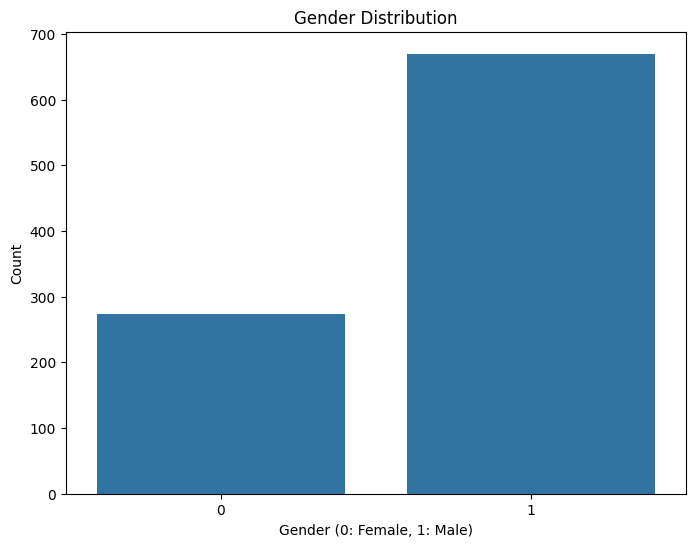

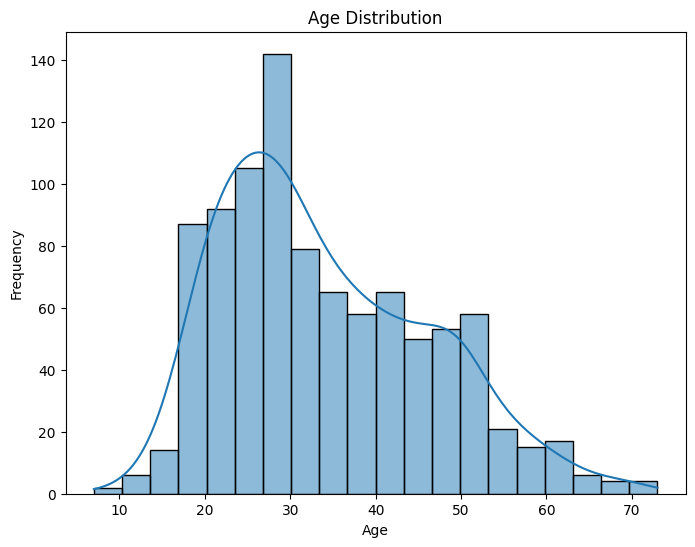

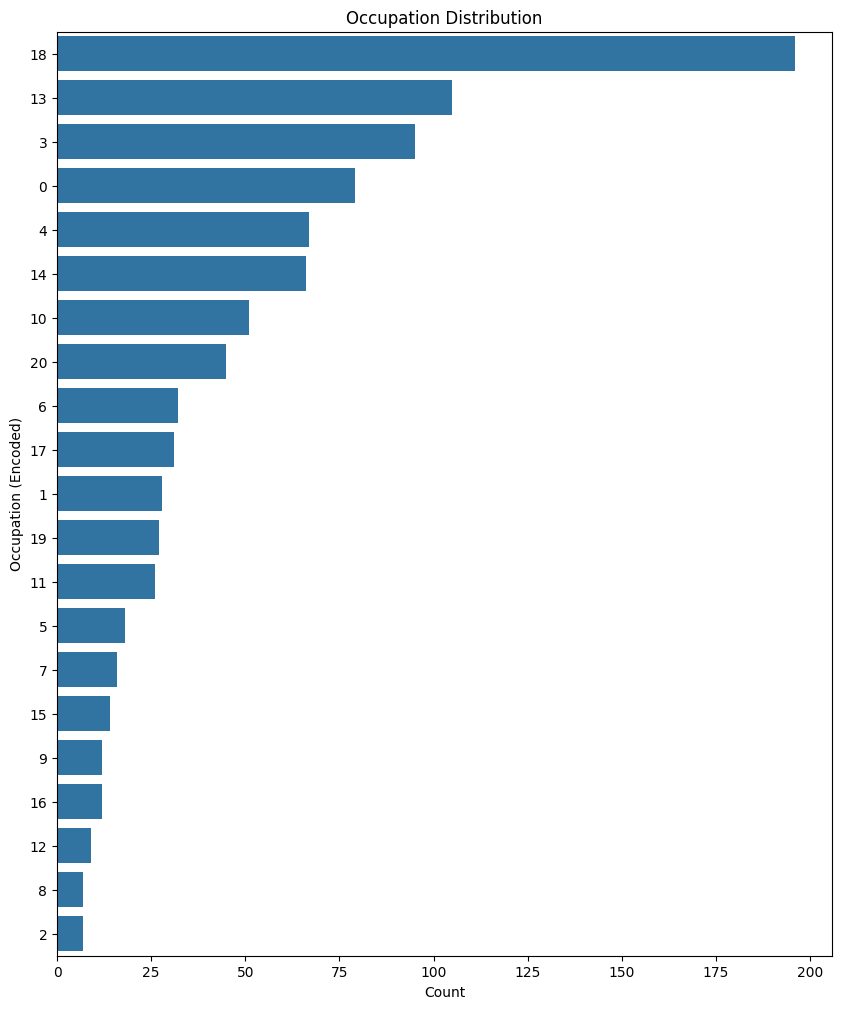

C:\Users\villa\AppData\Local\Temp\ipykernel_22268\3539156353.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


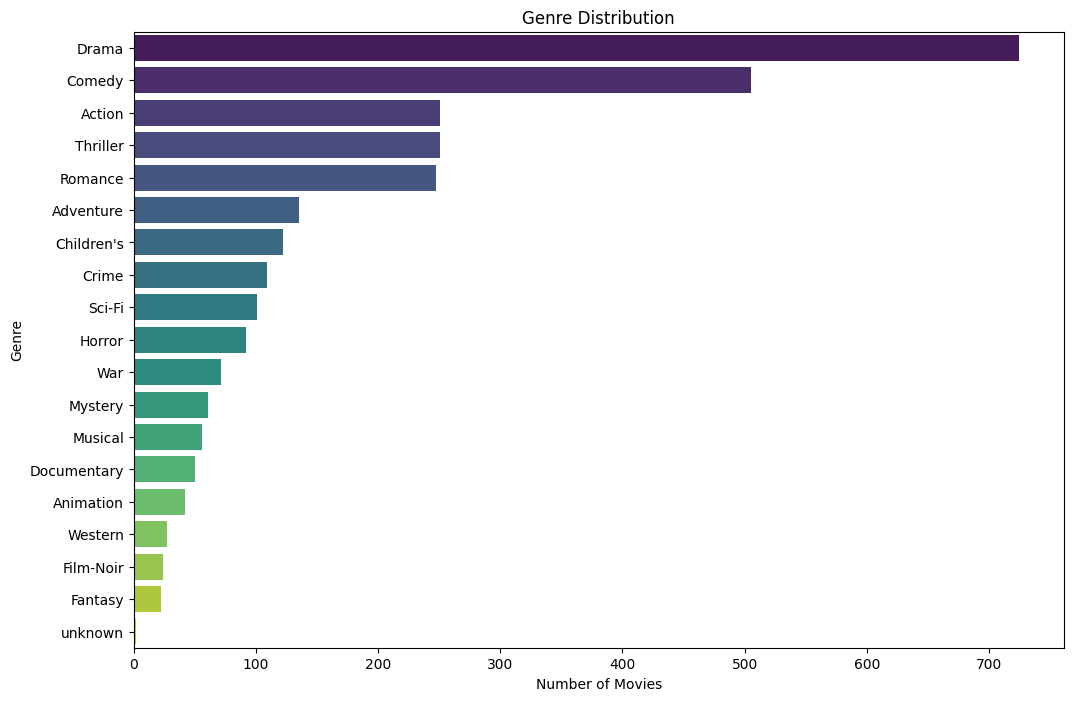

C:\Users\villa\AppData\Local\Temp\ipykernel_22268\3539156353.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings, palette='coolwarm')


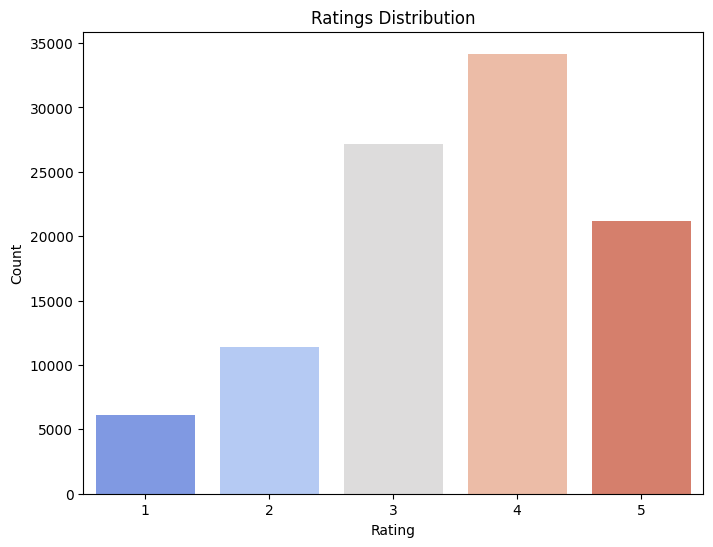

C:\Users\villa\AppData\Local\Temp\ipykernel_22268\3539156353.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_rating', y='movie_title', data=top_movies, palette='magma')


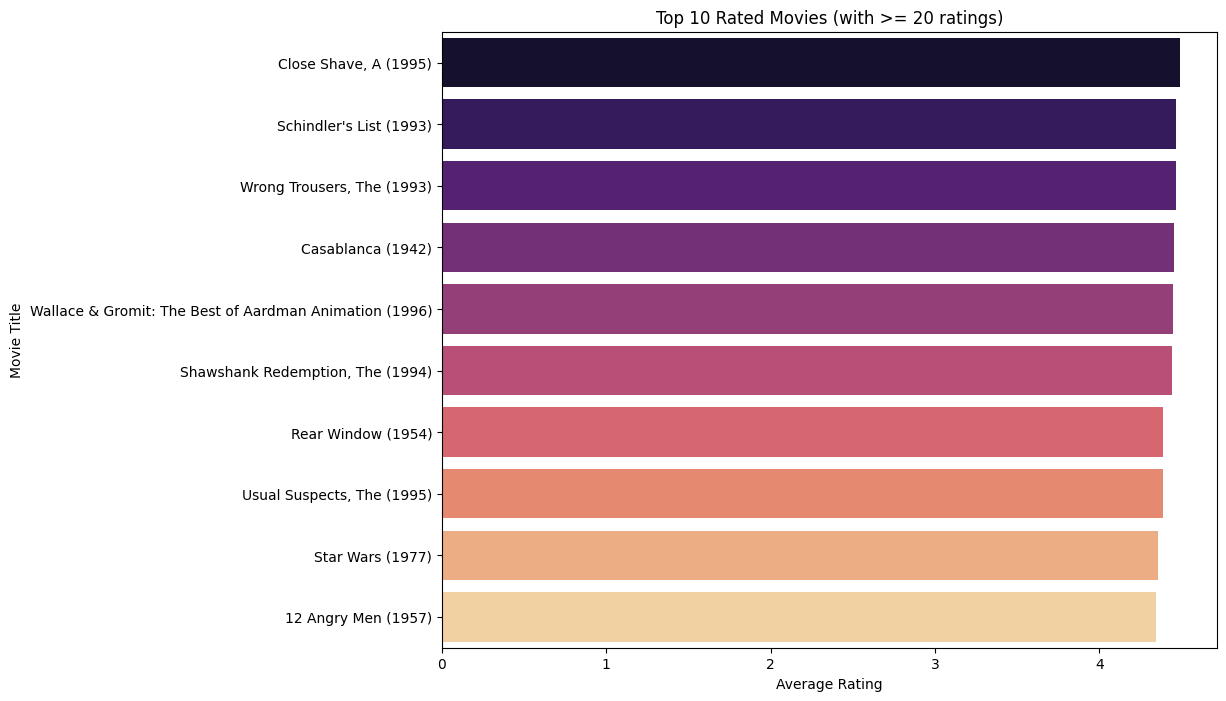

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Define paths
processed_data_path = os.path.join('..', 'data', 'processed')

# Load processed data
users = pd.read_csv(os.path.join(processed_data_path, 'users.csv'))
movies = pd.read_csv(os.path.join(processed_data_path, 'movies.csv'))
ratings = pd.read_csv(os.path.join(processed_data_path, 'ratings.csv'))

# User Demographics
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=users)
plt.title('Gender Distribution')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(users['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Occupation Distribution
plt.figure(figsize=(10, 12))
sns.countplot(y='occupation', data=users, order=users['occupation'].value_counts().index)
plt.title('Occupation Distribution')
plt.xlabel('Count')
plt.ylabel('Occupation (Encoded)')
plt.show()

# Movie Genres
genre_columns = ['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy',
                'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
                'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

plt.figure(figsize=(12, 8))
genre_counts = movies[genre_columns].sum().sort_values(ascending=False)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

# Ratings Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=ratings, palette='coolwarm')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Top Rated Movies
# Merge ratings with movies to get movie titles
ratings_with_titles = pd.merge(ratings, movies, on='movie_id')

# Calculate average rating and number of ratings per movie
movie_ratings = ratings_with_titles.groupby(['movie_id', 'movie_title']).agg(
    avg_rating=('rating', 'mean'),
    num_ratings=('rating', 'count')
).reset_index()

# Filter movies with a significant number of ratings (e.g., >= 20)
popular_movies = movie_ratings[movie_ratings['num_ratings'] >= 20]

# Get top 10 movies by average rating
top_movies = popular_movies.sort_values(by='avg_rating', ascending=False).head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x='avg_rating', y='movie_title', data=top_movies, palette='magma')
plt.title('Top 10 Rated Movies (with >= 20 ratings)')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()
